In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import pandas as pd
from load_dataset import Dataset
from model import TimeSeriesPredictor

In [51]:
import plotting

In [7]:
dataset = Dataset('../data/Dataset')

In [12]:
ts = dataset['hour_2263.csv']

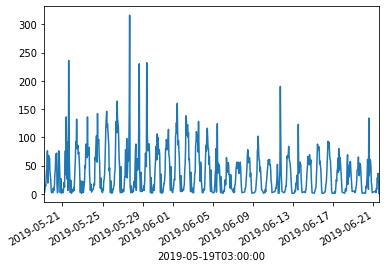

In [13]:
ts.plot()

In [52]:
ts_train, ts_test = ts[:-100], ts[-100:] 

In [53]:
predictor = TimeSeriesPredictor()

In [54]:
predictor.fit(ts_train)

In [95]:
predictor.fit_statistics(ts_train)

In [96]:
predictor.std

26.96531984384911

In [69]:
predictor.get_prediction_intervals(ts_test)

(2019-05-19T03:00:00
 2019-06-16 06:00:00   -55.020236
 2019-06-16 07:00:00   -47.020236
 2019-06-16 08:00:00   -42.020236
 2019-06-16 09:00:00   -30.020236
 2019-06-16 10:00:00   -12.020236
                          ...    
 2019-06-21 10:00:00   -34.020236
 2019-06-21 11:00:00   -35.020236
 2019-06-21 12:00:00   -26.020236
 2019-06-21 13:00:00   -37.020236
 2019-06-21 14:00:00   -61.020236
 Name: 1.0, Length: 100, dtype: float64, 2019-05-19T03:00:00
 2019-06-16 06:00:00     69.020236
 2019-06-16 07:00:00     77.020236
 2019-06-16 08:00:00     82.020236
 2019-06-16 09:00:00     94.020236
 2019-06-16 10:00:00    112.020236
                           ...    
 2019-06-21 10:00:00     90.020236
 2019-06-21 11:00:00     89.020236
 2019-06-21 12:00:00     98.020236
 2019-06-21 13:00:00     87.020236
 2019-06-21 14:00:00     63.020236
 Name: 1.0, Length: 100, dtype: float64)

In [85]:
predictions = predictor.predict_batch(ts_train, ts_test)

In [100]:
anoms = predictor.analyze(ts_test, predictions)

In [102]:
plotting.plot_multiple_ts(ts, ts_test, predictions, anoms)